In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Weather_Data.csv')
df

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Row101816,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0


<AxesSubplot:>

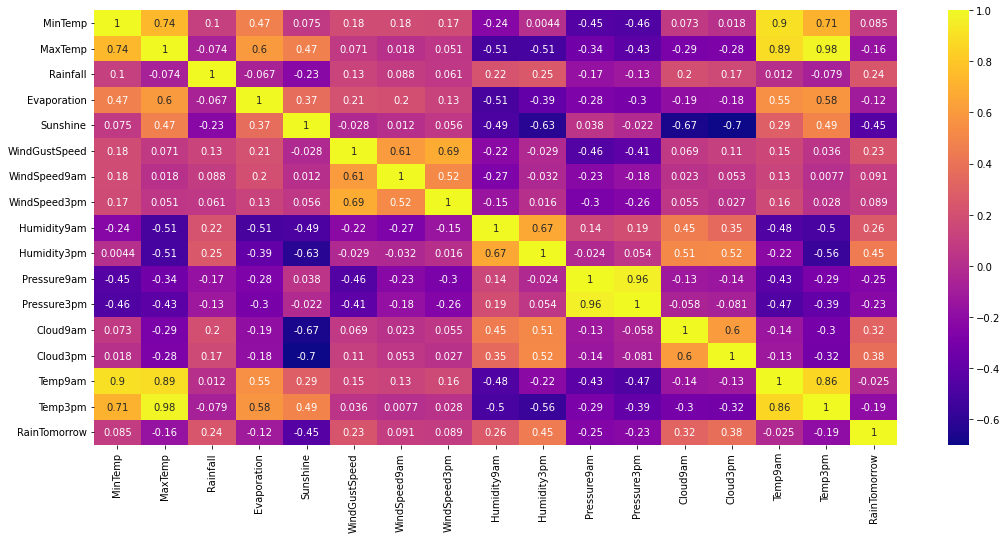

In [3]:
# Correlation Matrix
corr_matrix=df.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='plasma')

Highly positive correlated : MinTemp and MaxTemp , MinTemp and Temp9am , MinTemp and Temp3pm MaxTemp and Temp9am , MaxTemp and Temp3pm , Pressure9am and Pressure 3pm, Temp9am and Temp 3pm

Negatively correlated : Sunshine and Cloud9am , Sunshine and Cloud3pm

The columns MaxTemp,Evaporation,Sunshine,Pressure9am,Pressure3pm,Temp9am and Temp3pm have less negative correlation with the Target variable,'RainTomorrow'.

In [4]:
# Dropping the unnecessary features
df1=df.drop(['row ID','Rainfall','MinTemp','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Cloud9am','Cloud3pm','Temp9am','Temp3pm'],axis=1)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99516 non-null  object 
 1   MaxTemp        99286 non-null  float64
 2   WindGustDir    92995 non-null  object 
 3   WindGustSpeed  93036 non-null  float64
 4   WindDir9am     92510 non-null  object 
 5   WindDir3pm     96868 non-null  object 
 6   Humidity3pm    97010 non-null  float64
 7   Pressure3pm    89780 non-null  float64
 8   RainToday      98537 non-null  object 
 9   RainTomorrow   99516 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 7.6+ MB


In [6]:
df1.isna().sum()

Location            0
MaxTemp           230
WindGustDir      6521
WindGustSpeed    6480
WindDir9am       7006
WindDir3pm       2648
Humidity3pm      2506
Pressure3pm      9736
RainToday         979
RainTomorrow        0
dtype: int64

<AxesSubplot:>

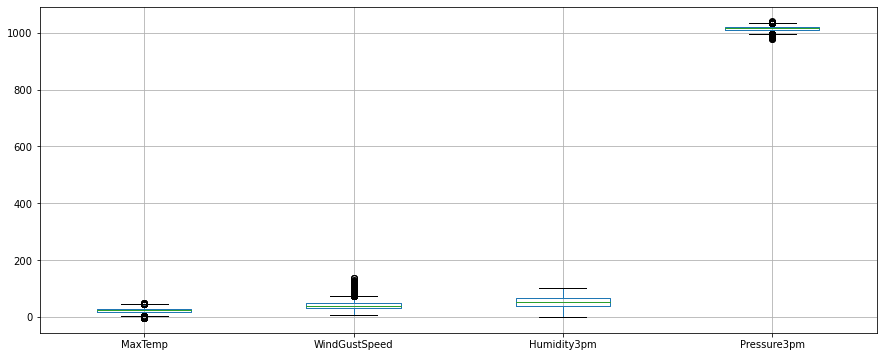

In [7]:
df1.boxplot(column=['MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm'],figsize=(15,6))

In [8]:
# Filling the missing values with median
df1['MaxTemp']=df1['MaxTemp'].fillna(df1['MaxTemp'].median())
df1['WindGustSpeed']=df1['WindGustSpeed'].fillna(df1['WindGustSpeed'].median())
df1['Pressure3pm']=df1['Pressure3pm'].fillna(df1['Pressure3pm'].median())

In [9]:
# Filling missing values in Humidity3pm' with mean
df1['Humidity3pm']=df1['Humidity3pm'].fillna(df1['Humidity3pm'].mean())

In [10]:
df1.isna().sum()

Location            0
MaxTemp             0
WindGustDir      6521
WindGustSpeed       0
WindDir9am       7006
WindDir3pm       2648
Humidity3pm         0
Pressure3pm         0
RainToday         979
RainTomorrow        0
dtype: int64

In [11]:
df1['WindGustDir'].mode()

0    W
Name: WindGustDir, dtype: object

In [12]:
df1['WindDir3pm'].mode()

0    SE
Name: WindDir3pm, dtype: object

In [13]:
df1['WindDir9am'].mode()

0    N
Name: WindDir9am, dtype: object

In [14]:
# Filling missing values with mode
df1['WindGustDir']=df1['WindGustDir'].fillna(df1['WindGustDir'].mode()[0])
df1['WindDir3pm']=df1['WindDir3pm'].fillna(df1['WindDir3pm'].mode()[0])
df1['WindDir9am']=df1['WindDir9am'].fillna(df1['WindDir9am'].mode()[0])

In [15]:
# When we fill the missing values in RainToday with mode, this might mislead our model.Hence
# dropping these rows
df1=df1.dropna(subset=['RainToday'])

In [16]:
df1=df1.reset_index(drop=True)

In [17]:
df1.isna().sum()

Location         0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Humidity3pm      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
dtype: int64

In [18]:
# Replacing 0% Humidity with 1%
df1['Humidity3pm']=df1['Humidity3pm'].replace(0,1)

In [19]:
# Finding interquartile range,detecting the outliers and handling them
features_with_outliers=['MaxTemp','WindGustSpeed','Pressure3pm']
for feature in features_with_outliers:
    Q1=np.percentile(df1[feature],25)
    Q3=np.percentile(df1[feature],75)
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    df1[feature]=np.where(df1[feature]<low_lim,low_lim,np.where(df1[feature]>up_lim,up_lim,df1[feature]))

<AxesSubplot:>

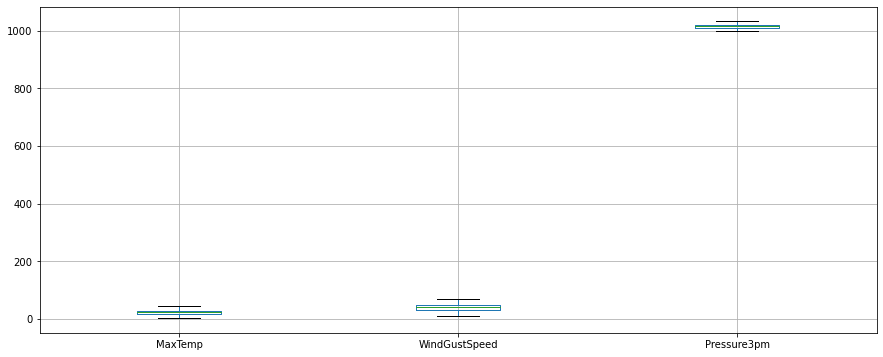

In [20]:
df1.boxplot(column=['MaxTemp','WindGustSpeed','Pressure3pm'],figsize=(15,6))

In [21]:
# Label Encoding Location,WindDir3pm,WindGustDir and RainToday
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df1['Location']=lab_enc.fit_transform(df1['Location'])
df1['WindDir3pm']=lab_enc.fit_transform(df1['WindDir3pm'])
df1['WindDir9am']=lab_enc.fit_transform(df1['WindDir9am'])
df1['WindGustDir']=lab_enc.fit_transform(df1['WindGustDir'])
df1['RainToday']=lab_enc.fit_transform(df1['RainToday'])

In [22]:
df1

,Location,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,2,22.9,13,44.0,13,14,22.0,1007.1,0,0
1,2,25.1,14,44.0,6,15,25.0,1007.8,0,0
2,2,32.3,13,41.0,1,7,33.0,1006.0,0,0
3,2,29.7,14,56.0,13,13,23.0,1005.4,0,0
4,2,26.7,13,35.0,10,13,19.0,1010.1,0,0
...,...,...,...,...,...,...,...,...,...,...
98532,41,20.7,2,41.0,9,0,32.0,1024.3,0,0
98533,41,21.8,0,31.0,2,0,27.0,1021.2,0,0
98534,41,23.4,0,31.0,9,1,24.0,1020.3,0,0
98535,41,25.3,6,22.0,9,3,21.0,1019.1,0,0


<AxesSubplot:>

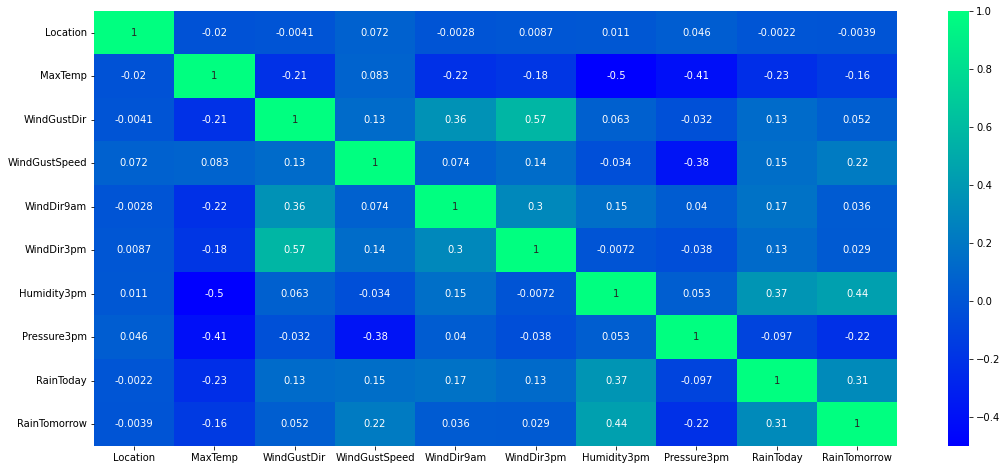

In [23]:
# Correlation Matrix after Label Encoding
corr_matrix=df1.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='winter')

In [24]:
df1

,Location,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,2,22.9,13,44.0,13,14,22.0,1007.1,0,0
1,2,25.1,14,44.0,6,15,25.0,1007.8,0,0
2,2,32.3,13,41.0,1,7,33.0,1006.0,0,0
3,2,29.7,14,56.0,13,13,23.0,1005.4,0,0
4,2,26.7,13,35.0,10,13,19.0,1010.1,0,0
...,...,...,...,...,...,...,...,...,...,...
98532,41,20.7,2,41.0,9,0,32.0,1024.3,0,0
98533,41,21.8,0,31.0,2,0,27.0,1021.2,0,0
98534,41,23.4,0,31.0,9,1,24.0,1020.3,0,0
98535,41,25.3,6,22.0,9,3,21.0,1019.1,0,0


In [25]:
X=df1.drop(['RainTomorrow'],axis=1)
y=df1['RainTomorrow']

In [26]:
#Standard Scaling 
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()

In [27]:
X1=X.drop(['Location','WindDir9am','WindDir3pm','WindGustDir','RainToday'],axis=1)

In [28]:
X1=std_scl.fit_transform(X1)

In [29]:
X1=pd.DataFrame(X1,columns=['MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm'])

In [30]:
X=X.drop(['MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm'],axis=1)

In [31]:
X=pd.concat([X,X1],axis=1)

In [32]:
X

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MaxTemp,WindGustSpeed,Humidity3pm,Pressure3pm
0,2,13,13,14,0,-0.046285,0.361178,-1.432427,-1.248508
1,2,14,6,15,0,0.264175,0.361178,-1.286268,-1.141987
2,2,13,1,7,0,1.280228,0.115368,-0.896513,-1.415900
3,2,14,13,13,0,0.913320,1.344418,-1.383707,-1.507204
4,2,13,10,13,0,0.489965,-0.376253,-1.578585,-0.791986
...,...,...,...,...,...,...,...,...,...
98532,41,2,9,0,0,-0.356746,0.115368,-0.945232,1.368885
98533,41,0,2,0,0,-0.201516,-0.704000,-1.188829,0.897145
98534,41,0,9,1,0,0.024274,-0.704000,-1.334988,0.760189
98535,41,6,9,3,0,0.292399,-1.441430,-1.481146,0.577580


In [33]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

###  Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr_model=LogisticRegression().fit(X_train,y_train)
y_pred_log=lr_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [37]:
confusion_matrix(y_test,y_pred_log)

array([[14481,   819],
       [ 2366,  2042]], dtype=int64)

In [38]:
print('Accuracy score is :',accuracy_score(y_test,y_pred_log))

Accuracy score is : 0.8383905013192612


In [39]:
precision_score(y_test,y_pred_log)

0.7137364557846907

In [40]:
recall_score(y_test,y_pred_log)

0.4632486388384755

In [41]:
f1_score(y_test,y_pred_log)

0.5618379419452469

In [42]:
from sklearn.metrics import classification_report
print('classification_report :\n',classification_report(y_test,y_pred_log))

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     15300
           1       0.71      0.46      0.56      4408

    accuracy                           0.84     19708
   macro avg       0.79      0.70      0.73     19708
weighted avg       0.83      0.84      0.83     19708



### Knn Model

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
     classifier=KNeighborsClassifier(n_neighbors=k)
     kNN_model=classifier.fit(X_train,y_train)
     y_pred_kNN=kNN_model.predict(X_test)
     acc=accuracy_score(y_test,y_pred_kNN)
     metric_k.append(acc)

In [45]:
metric_k

[0.8174345443474731,
 0.8210878830931602,
 0.8271767810026385,
 0.8242845544956363,
 0.8292064136391313,
 0.8249441851024965,
 0.8289527095595697,
 0.825654556525269,
 0.8302719707732901,
 0.8260097422366551,
 0.8300182666937285,
 0.8266693728435153]

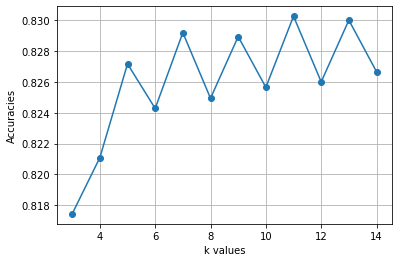

In [46]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [47]:
accuracy_score(y_test,y_pred_kNN)

0.8266693728435153

In [48]:
classifier=KNeighborsClassifier(n_neighbors=11)
kNN_model=classifier.fit(X_train,y_train)
y_pred_kNN=kNN_model.predict(X_test)

In [49]:
confusion_matrix(y_test,y_pred_kNN)

array([[14791,   509],
       [ 2836,  1572]], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred_kNN)

0.8302719707732901

In [51]:
precision_score(y_test,y_pred_kNN)

0.7554060547813551

In [52]:
recall_score(y_test,y_pred_kNN)

0.3566243194192377

In [53]:
print('classification_report :\n',classification_report(y_test,y_pred_kNN))

classification_report :
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     15300
           1       0.76      0.36      0.48      4408

    accuracy                           0.83     19708
   macro avg       0.80      0.66      0.69     19708
weighted avg       0.82      0.83      0.81     19708



### SVM Linear

In [54]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')

In [55]:
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

In [56]:
confusion_matrix(y_test,y_pred_svm)
accuracy_score(y_test,y_pred_svm)

0.8391008727420337

### SVM rbf

In [57]:
svm_clf=SVC(kernel='rbf')
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm1=svm_clf.predict(X_test)

In [58]:
confusion_matrix(y_test,y_pred_svm1)
accuracy_score(y_test,y_pred_svm1)

0.8408768012989649

### Decision  Tree

In [59]:
X=df1.drop(['RainTomorrow'],axis=1)
y=df1['RainTomorrow']

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dec_tree_model=DecisionTreeClassifier().fit(X_train,y_train)
y_pred_tree=dec_tree_model.predict(X_test)

In [63]:
confusion_matrix(y_test,y_pred_tree)

array([[13056,  2244],
       [ 2116,  2292]], dtype=int64)

In [64]:
accuracy_score(y_test,y_pred_tree)

0.7787700426222853

In [65]:
precision_score(y_test,y_pred_tree)

0.5052910052910053

In [66]:
recall_score(y_test,y_pred_tree)

0.5199637023593466

In [67]:
f1_score(y_test,y_pred_tree)

0.5125223613595706

In [68]:
print('classification_report :\n',classification_report(y_test,y_pred_tree))

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.85      0.86     15300
           1       0.51      0.52      0.51      4408

    accuracy                           0.78     19708
   macro avg       0.68      0.69      0.68     19708
weighted avg       0.78      0.78      0.78     19708



### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rand_for_model=RandomForestClassifier().fit(X_train,y_train)
y_pred_rand=rand_for_model.predict(X_test)

In [71]:
confusion_matrix(y_test,y_pred_rand)

array([[14531,   769],
       [ 2183,  2225]], dtype=int64)

In [72]:
accuracy_score(y_test,y_pred_rand)

0.8502131114268318

In [73]:
precision_score(y_test,y_pred_rand)

0.7431529726118904

In [74]:
recall_score(y_test,y_pred_rand)

0.5047640653357531

In [75]:
f1_score(y_test,y_pred_rand)

0.6011888678735476

In [76]:
print('classification_report :\n',classification_report(y_test,y_pred_rand))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.81      0.73      0.75     19708
weighted avg       0.84      0.85      0.84     19708



### GradientBoosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
grad_boost_model=GradientBoostingClassifier().fit(X_train,y_train)
y_pred_grad=grad_boost_model.predict(X_test)

In [79]:
confusion_matrix(y_test,y_pred_grad)

array([[14575,   725],
       [ 2309,  2099]], dtype=int64)

In [80]:
accuracy_score(y_test,y_pred_grad)

0.8460523645220215

In [82]:
precision_score(y_test,y_pred_grad)

0.7432719546742209

In [83]:
recall_score(y_test,y_pred_grad)

0.4761796733212341

In [84]:
f1_score(y_test,y_pred_grad)

0.5804756637168141

In [85]:
print('classification_report :\n',classification_report(y_test,y_pred_grad))

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.95      0.91     15300
           1       0.74      0.48      0.58      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.71      0.74     19708
weighted avg       0.84      0.85      0.83     19708



###  Naive Bayes Classification

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
gaus_nb_model=GaussianNB().fit(X_train,y_train)
y_pred_gaus=gaus_nb_model.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred_gaus)

0.80774304850822

In [89]:
precision_score(y_test,y_pred_gaus)

0.5724994143827594

In [90]:
recall_score(y_test,y_pred_gaus)

0.5544464609800362

In [91]:
f1_score(y_test,y_pred_gaus)

0.5633283392877723

### Fine Tuning Randon Forest Classifier

In [92]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [93]:
parameters={'n_estimators':[50,100,150,250],'max_depth':[3,6,9,None]}

In [94]:
# Hyperparameter Tuning-GridSearchCV
grid_model=GridSearchCV(RandomForestClassifier(),parameters,scoring='f1')
grid_model.fit(X_train,y_train)
print(grid_model.best_params_)

{'max_depth': None, 'n_estimators': 250}


In [95]:
model_grid=RandomForestClassifier(n_estimators=250,max_depth=None)
model1=model_grid.fit(X_train,y_train)
y_pred_grid=model1.predict(X_test)

In [96]:
print('classification_report :\n',classification_report(y_test,y_pred_grid))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.72      0.75     19708
weighted avg       0.84      0.85      0.84     19708



In [97]:
accuracy_score(y_test,y_pred_grid)

0.8489445910290238

In [98]:
# Hyperparameter Tuning-RandomizedSearchCV
random_model=RandomizedSearchCV(RandomForestClassifier(),parameters,scoring='f1')
random_model.fit(X_train,y_train)
print(random_model.best_params_)

{'n_estimators': 150, 'max_depth': None}


In [99]:
model_random=RandomForestClassifier(n_estimators=250,max_depth=None)
model2=model_random.fit(X_train,y_train)
y_pred_random=model2.predict(X_test)

In [100]:
print('classification_report :\n',classification_report(y_test,y_pred_random))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.51      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.73      0.75     19708
weighted avg       0.84      0.85      0.84     19708



In [101]:
accuracy_score(y_test,y_pred_random)

0.8497564440836208

In [102]:
f1_score(y_test,y_pred_random)

0.6007819873264123